In [8]:
#의사결정나무 알고리즘
import pandas as pd
import numpy as np
import sklearn   #pip install scikit-learn
import os
#의사결정나무 분류모델을 위한 패키지
from sklearn.tree import DecisionTreeClassifier,plot_tree

#학습 및 테스트 데이터셋 분리를 위한 패키지
from sklearn.model_selection import train_test_split,GridSearchCV

from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving credit_score_data.csv to credit_score_data.csv


In [ ]:
import os
print(os.listdir())

['.config', 'sample_data']


In [ ]:
df = pd.read_csv("/content/credit_score_data.csv", encoding="utf-8")  # 경로 확인 후 실행
df

,Age,Income,Loan_Amount,Credit_Card_Usage,Credit_Score
0,52,120000,31569,0.049852,Good
1,39,30519,8425,0.417730,Bad
2,44,31721,13004,0.168279,Good
3,57,97216,35535,0.386869,Good
4,53,33304,12123,0.168468,Good
...,...,...,...,...,...
95,42,54952,22733,0.228624,Good
96,35,88070,27281,0.257112,Good
97,52,90377,32381,0.297697,Good
98,36,120000,31206,0.230433,Good


In [ ]:
from sklearn.preprocessing import LabelEncoder
df['Credit_Score']=LabelEncoder().fit_transform(df['Credit_Score'])
df

,Age,Income,Loan_Amount,Credit_Card_Usage,Credit_Score
0,52,120000,31569,0.049852,1
1,39,30519,8425,0.417730,0
2,44,31721,13004,0.168279,1
3,57,97216,35535,0.386869,1
4,53,33304,12123,0.168468,1
...,...,...,...,...,...
95,42,54952,22733,0.228624,1
96,35,88070,27281,0.257112,1
97,52,90377,32381,0.297697,1
98,36,120000,31206,0.230433,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                100 non-null    int64  
 1   Income             100 non-null    int64  
 2   Loan_Amount        100 non-null    int64  
 3   Credit_Card_Usage  100 non-null    float64
 4   Credit_Score       100 non-null    int64  
dtypes: float64(1), int64(4)
memory usage: 4.0 KB


In [ ]:
X=df[['Age','Income','Loan_Amount','Credit_Card_Usage']]
y=df['Credit_Score']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=11)

In [ ]:
model=DecisionTreeClassifier(random_state=11)
model.fit(X_train,y_train)

DecisionTreeClassifier(random_state=11)

In [ ]:
pred=model.predict(X_test)
pred

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0])

In [ ]:
#모델 성능(의사결정나무)
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
acc=accuracy_score(y_test,pred)
print(f"정확도:{acc}")  # 의사결정나무에서 나온 정확도

precision=precision_score(y_test,pred)
print(f"정밀도:{precision}")  # 정밀도

recall=recall_score(y_test,pred)
print(f"재현율:{recall}")  # 재현율

f1=f1_score(y_test,pred)
print(f"f1_score:{f1}")

정확도:1.0
정밀도:1.0
재현율:1.0
f1_score:1.0


정확도 (Accuracy):
전체 예측 중 올바른 예측의 비율  
가장 직관적인 지표이지만 클래스 불균형이 있을 때 왜곡될 수 있음

정밀도 (Precision):
양성으로 예측한 것 중 실제 양성인 비율  
긍정 예측의 정확성을 측정  
거짓 양성(FP)을 최소화하는 것이 중요할 때 유용

재현율 (Recall):
실제 양성 중 양성으로 예측한 비율  
실제 양성을 얼마나 잘 찾아내는지 측정  
거짓 음성(FN)을 최소화하는 것이 중요할 때 유용

F1 Score:  
정밀도와 재현율의 조화평균  
두 지표 간의 균형을 나타냄 한쪽으로 치우치지 않은 종합적인 성능 평가 가능

사용 예시:
정확도: 일반적인 분류 문제, 클래스 균형이 잘 맞을 때   
정밀도: 스팸 메일 분류(정상 메일을 스팸으로 분류하면 안 될 때)  
재현율: 질병 진단(환자를 놓치면 안 될 때)  
F1 Score: 정밀도와 재현율 모두 중요할 때

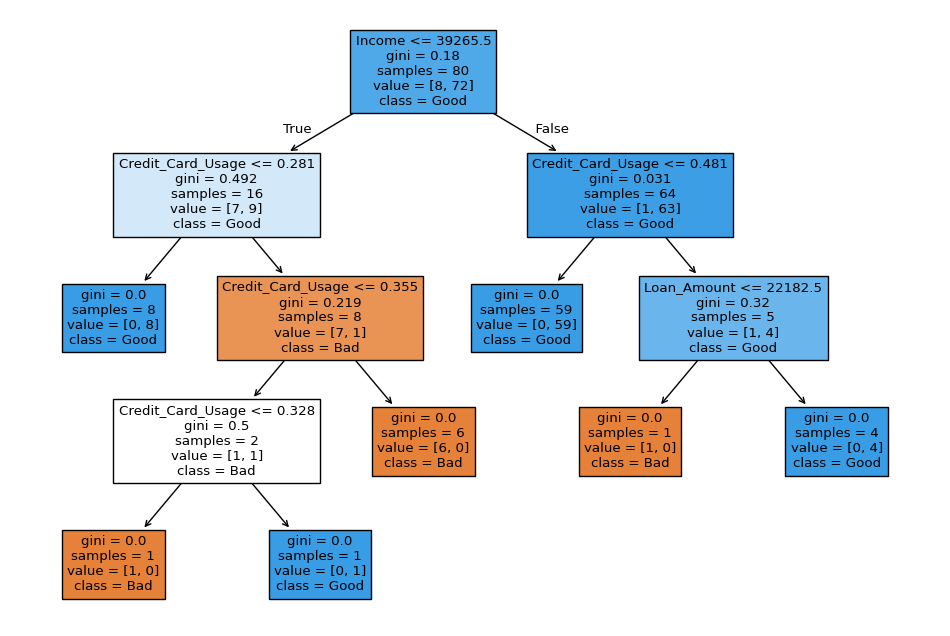

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
plot_tree(model,feature_names=X.columns,class_names=['Bad','Good'],filled=True)
plt.show()

In [ ]:
#하이퍼파라미터 설정
param_grid={
    'criterion':['gini','entropy'],  #불순도 측정 방법
    'max_depth':[None,5,10,15,20],
    'min_samples_split':[2,5,10],  # 내부 노드 분할하기 위한 최소 샘플 수
}

#그리드 서치 수행
grid_search=GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train,y_train)

#최적의 하이퍼파라미터
print("최적의 하이퍼파라미터:",grid_search.best_params_)

#최적의 모델로 예측
best_model=grid_search.best_estimator_
y_pred=best_model.predict(X_test)

#정확도 및 분류 보고서 평가
accuracy=accuracy_score(y_test,pred)
print(f"정확도:{accuracy}")
print(classification_report(y_test,pred))
print("혼동행렬:\n",confusion_matrix(y_test,pred))

최적의 하이퍼파라미터: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 2}
정확도:1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00        15

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20

혼동행렬:
 [[ 5  0]
 [ 0 15]]


In [ ]:
import joblib
joblib.dump(best_model,'credit_score_model.pkl')

['credit_score_model.pkl']

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

In [2]:
from google.colab import files
uploaded = files.upload()

Saving diabetes_data.csv to diabetes_data.csv


In [4]:
import pandas as pd
df = pd.read_csv("/content/diabetes_data.csv", encoding="utf-8")  # 경로 확인 후 실행
df

,Age,Gender,Blood_Pressure,Cholesterol,Diabetes
0,76,Female,105,209,Yes
1,56,Female,132,265,Yes
2,64,Female,80,139,Yes
3,80,Female,102,182,Yes
4,78,Female,96,191,Yes
...,...,...,...,...,...
995,56,Female,90,210,Yes
996,47,Female,82,190,Yes
997,51,Female,120,202,Yes
998,32,Female,112,227,Yes


In [5]:
df['Gender']=LabelEncoder().fit_transform(df['Gender'])  #남1, 여0

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Age             1000 non-null   int64
 1   Gender          1000 non-null   int64
 2   Blood_Pressure  1000 non-null   int64
 3   Cholesterol     1000 non-null   int64
 4   Diabetes        1000 non-null   int64
dtypes: int64(5)
memory usage: 39.2 KB


In [9]:
X=df[['Age','Gender','Blood_Pressure','Cholesterol']]
y=df['Diabetes'].map({'Yes':1,'No':0})
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=11)
model=DecisionTreeClassifier(random_state=11)
model.fit(X_train,y_train)

DecisionTreeClassifier(random_state=11)

In [11]:
pred=model.predict(X_test)
pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [12]:
#모델 성능(의사결정나무)
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
acc=accuracy_score(y_test,pred)
print(f"정확도:{acc}")  # 의사결정나무에서 나온 정확도

precision=precision_score(y_test,pred)
print(f"정밀도:{precision}")  # 정밀도

recall=recall_score(y_test,pred)
print(f"재현율:{recall}")  # 재현율

f1=f1_score(y_test,pred)
print(f"f1_score:{f1}")

정확도:0.995
정밀도:0.9949748743718593
재현율:1.0
f1_score:0.9974811083123426


In [ ]:
df

,Age,Gender,Blood_Pressure,Cholesterol,Diabetes
0,76,0,105,209,1
1,56,0,132,265,1
2,64,0,80,139,1
3,80,0,102,182,1
4,78,0,96,191,1
...,...,...,...,...,...
995,56,0,90,210,1
996,47,0,82,190,1
997,51,0,120,202,1
998,32,0,112,227,1


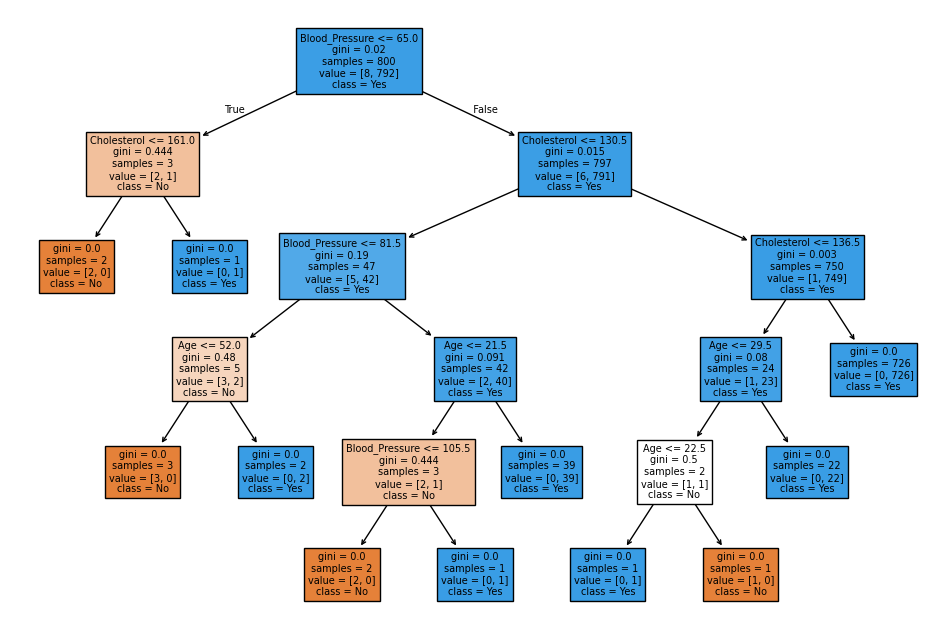

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
plot_tree(model,feature_names=X.columns,class_names=['No','Yes'],filled=True)
plt.show()

# 새 섹션

# 새 섹션

In [16]:
import joblib
joblib.dump(model,'diabetes_model.pkl')

['diabetes_model.pkl']